In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('train.csv')
print(data.head(5))
l = data['label']
d = data.drop('label',axis=1 )

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
lab = l.head(15000)
dat = d.head(15000)

In [4]:
std_data = StandardScaler().fit_transform(dat)
std_data.shape

(15000, 784)

In [5]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(std_data, lab)

In [6]:
data=pd.DataFrame(lda_data)
data['class']= lab
data.columns=["LDA 1","LDA 2","class"]
data.head()

,LDA 1,LDA 2,class
0,0.656290,3.556412,1
1,-5.253719,-2.753389,0
2,0.373285,5.444146,1
3,-0.385170,-1.067781,4
4,-5.106695,-2.191829,0


In [7]:
lda_data = np.vstack((lda_data.T,lab)).T

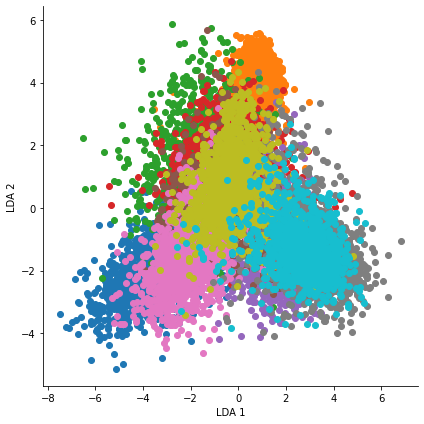

In [8]:
df = pd.DataFrame(data= lda_data, columns= ('LDA 1','LDA 2', 'label'))
sn.FacetGrid(df,hue='label', height=6).map(plt.scatter,'LDA 1','LDA 2').add_legend
plt.show()